In [13]:
#also check https://github.com/quantumlib/Stim/blob/main/doc/getting_started.ipynb
import stim
circuit = stim.Circuit()

# First, the circuit will initialize a Bell pair.
circuit.append("H", [0])
circuit.append("CNOT", [0, 1])

# Then, the circuit will measure both qubits of the Bell pair in the Z basis.
circuit.append("M", [0, 1])

# Let's see the circuit's representation using stim's circuit language:
print(repr(circuit))

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
''')


In [16]:
sampler = circuit.compile_sampler()
print(sampler.sample(shots=10))

circuit2 = stim.Circuit()
circuit2.append("H", [0])
circuit2.append("CNOT", [0, 1])

# if no Measurement, what will happen?

sampler2 = circuit2.compile_sampler()
print(sampler2.sample(shots=10))

#no results

[[False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False False]]
[]


In [18]:
# Indicate the two previous measurements are supposed to consistently agree.
circuit.append("DETECTOR", [stim.target_rec(-1), stim.target_rec(-2)])
print(repr(circuit))

stim.Circuit('''
    H 0
    CX 0 1
    M 0 1
    H 0
    CX 0 1
    DETECTOR rec[-1] rec[-2]
''')


In [19]:
circuit = stim.Circuit("""
    H 0
    CX 0 1
    X_ERROR(0.2) 0 1
    M 0 1
    DETECTOR rec[-1] rec[-2]
""")

In [20]:
sampler = circuit.compile_detector_sampler()
print(sampler.sample(shots=10))

[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]]


In [27]:
import numpy as np
print(np.sum(sampler.sample(shots=10**6)) / 10**6)
sampler.sample(shots=10)


SyntaxError: unexpected EOF while parsing (232766292.py, line 4)

In [33]:
print(np.sum([True,False,True,True]))

3


In [32]:
print(np.sum([[True],[False],[True],[True]]))

3


In [34]:
circuit = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=30,
    distance=9,
    before_round_data_depolarization=0.03)
print(repr(circuit))

stim.Circuit('''
    R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    TICK
    DEPOLARIZE1(0.03) 0 2 4 6 8 10 12 14 16
    CX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    TICK
    CX 2 1 4 3 6 5 8 7 10 9 12 11 14 13 16 15
    TICK
    MR 1 3 5 7 9 11 13 15
    DETECTOR(1, 0) rec[-8]
    DETECTOR(3, 0) rec[-7]
    DETECTOR(5, 0) rec[-6]
    DETECTOR(7, 0) rec[-5]
    DETECTOR(9, 0) rec[-4]
    DETECTOR(11, 0) rec[-3]
    DETECTOR(13, 0) rec[-2]
    DETECTOR(15, 0) rec[-1]
    REPEAT 29 {
        TICK
        DEPOLARIZE1(0.03) 0 2 4 6 8 10 12 14 16
        CX 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
        TICK
        CX 2 1 4 3 6 5 8 7 10 9 12 11 14 13 16 15
        TICK
        MR 1 3 5 7 9 11 13 15
        SHIFT_COORDS(0, 1)
        DETECTOR(1, 0) rec[-8] rec[-16]
        DETECTOR(3, 0) rec[-7] rec[-15]
        DETECTOR(5, 0) rec[-6] rec[-14]
        DETECTOR(7, 0) rec[-5] rec[-13]
        DETECTOR(9, 0) rec[-4] rec[-12]
        DETECTOR(11, 0) rec[-3] rec[-11]
        DETECTOR(13, 0) rec[-

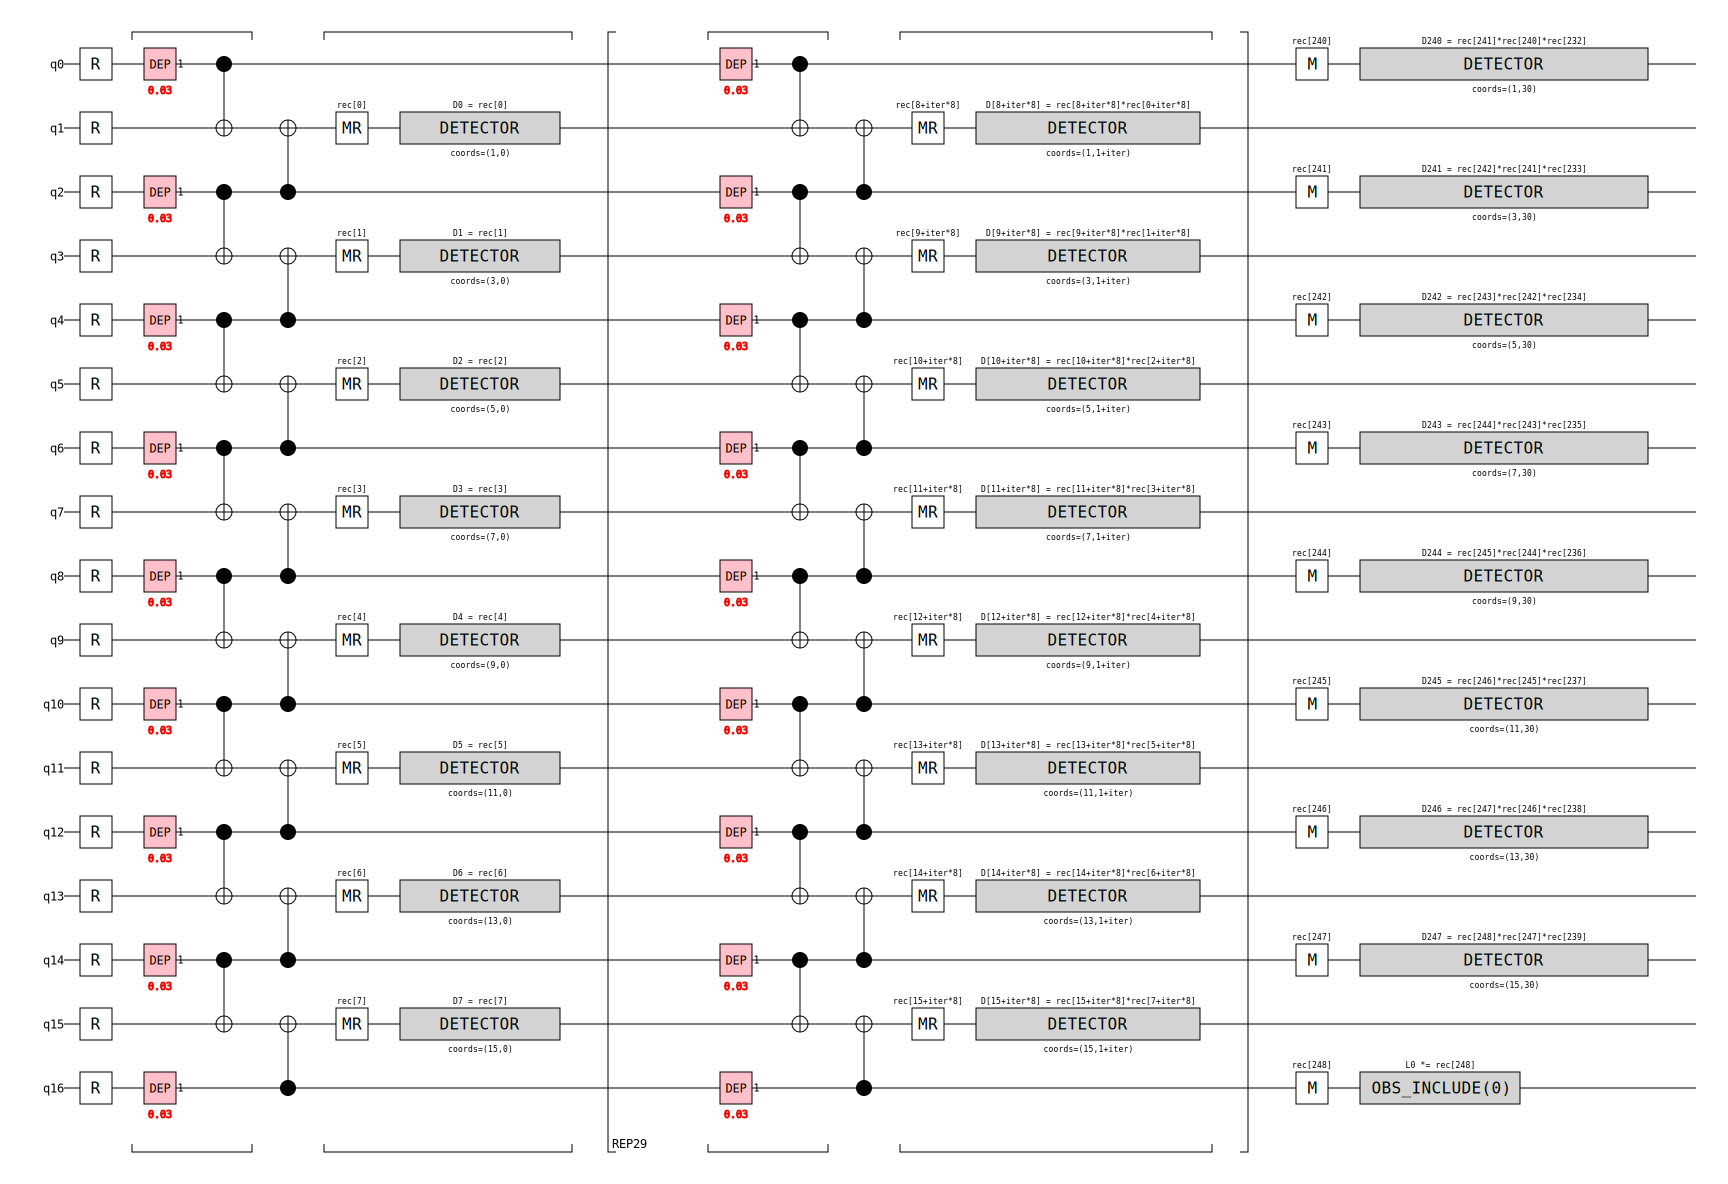

In [35]:
#The DETECTOR instructions, that annotate which measurements to compare, 
#also include space and time coordinates. These coordinates have no effect 
#TICK annotations (which indicate divisions between layers of gates in the circuit),
#a REPEAT block (to avoid restating the same ten operations a hundred times), 
#and an OBSERVABLE_INCLUDE instruction (identifying the measurement corresponding to 
#the logical value preserved by the circuit).
circuit.diagram(type="timeline-svg")

In [36]:
sampler = circuit.compile_sampler()
one_sample = sampler.sample(shots=1)[0]
print(one_sample)
for k in range(0, len(one_sample), 8):
    timeslice = one_sample[k:k+8]
    print("".join("1" if e else "_" for e in timeslice))

[False False False False False False False False  True False  True False
 False False False False  True False  True False False False False False
  True False  True  True  True False False False  True False  True  True
  True False False False  True False  True  True  True False False False
  True False  True  True  True False False False  True False  True  True
  True False False False  True False  True  True  True False False False
  True False  True  True  True False False False  True False  True  True
  True False False False  True False  True  True  True False False False
  True False  True  True  True False False False  True False  True  True
  True False False False  True False  True  True  True False False False
  True False  True  True  True False False False  True False  True  True
  True False False False  True False  True False False False False False
  True False  True False False False False False  True False  True False
 False False False False  True False  True False Fa

In [37]:
detector_sampler = circuit.compile_detector_sampler()
one_sample = detector_sampler.sample(shots=1)[0]
for k in range(0, len(one_sample), 8):
    timeslice = one_sample[k:k+8]
    print("".join("!" if e else "_" for e in timeslice))

________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
________
!_______
________
________
________
!_______
________
________
________


In [38]:
print(repr(circuit.detector_error_model()))

stim.DetectorErrorModel('''
    error(0.02) D0
    error(0.02) D0 D1
    error(0.02) D1 D2
    error(0.02) D2 D3
    error(0.02) D3 D4
    error(0.02) D4 D5
    error(0.02) D5 D6
    error(0.02) D6 D7
    error(0.02) D7 L0
    detector(1, 0) D0
    detector(3, 0) D1
    detector(5, 0) D2
    detector(7, 0) D3
    detector(9, 0) D4
    detector(11, 0) D5
    detector(13, 0) D6
    detector(15, 0) D7
    repeat 28 {
        error(0.02) D8
        error(0.02) D8 D9
        error(0.02) D9 D10
        error(0.02) D10 D11
        error(0.02) D11 D12
        error(0.02) D12 D13
        error(0.02) D13 D14
        error(0.02) D14 D15
        error(0.02) D15 L0
        shift_detectors(0, 1) 0
        detector(1, 0) D8
        detector(3, 0) D9
        detector(5, 0) D10
        detector(7, 0) D11
        detector(9, 0) D12
        detector(11, 0) D13
        detector(13, 0) D14
        detector(15, 0) D15
        shift_detectors 8
    }
    error(0.02) D8
    error(0.02) D8 D9
    error(0.02) D

In [39]:
import pymatching
import sinter
from typing import *

In [40]:
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    num_detectors = circuit.num_detectors
    num_observables = circuit.num_observables

    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Extract decoder configuration data from the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)

    # Run the decoder.
    predictions = sinter.predict_observables(
        dem=detector_error_model,
        dets=detection_events,
        decoder='pymatching',
    )

    # Count the mistakes.
    num_errors = 0
    for actual_flip, predicted_flip in zip(observable_flips, predictions):
        if not np.array_equal(actual_flip, predicted_flip):
            num_errors += 1
    return num_errors

In [41]:
circuit = stim.Circuit.generated("repetition_code:memory", rounds=100, distance=9, before_round_data_depolarization=0.03)
num_shots = 100_000
num_logical_errors = count_logical_errors(circuit, num_shots)
print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots")

there were 2 wrong predictions (logical errors) out of 100000 shots


In [42]:
sampler = circuit.compile_detector_sampler()
_, observable_flips = sampler.sample(shots=num_shots, separate_observables=True)
naive_predictions = np.zeros_like(observable_flips);
num_naive_errors = 0
for actual_flip, predicted_flip in zip(observable_flips, naive_predictions):
    if not np.array_equal(actual_flip, predicted_flip):
        num_naive_errors += 1
print("there were", num_naive_errors, "wrong naive predictions out of", num_shots, "shots")

there were 49686 wrong naive predictions out of 100000 shots


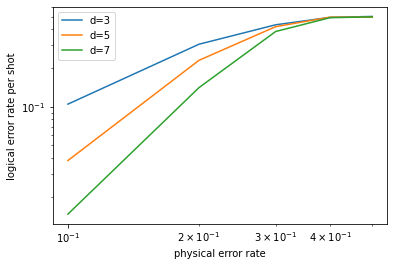

In [43]:
import matplotlib.pyplot as plt

num_shots = 10_000
for d in [3, 5, 7]:
    xs = []
    ys = []
    for noise in [0.1, 0.2, 0.3, 0.4, 0.5]:
        circuit = stim.Circuit.generated(
            "repetition_code:memory",
            rounds=d * 3,
            distance=d,
            before_round_data_depolarization=noise)
        num_errors_sampled = count_logical_errors(circuit, num_shots)
        xs.append(noise)
        ys.append(num_errors_sampled / num_shots)
    plt.plot(xs, ys, label="d=" + str(d))
plt.loglog()
plt.xlabel("physical error rate")
plt.ylabel("logical error rate per shot")
plt.legend()
plt.show()

aaa

# test


In [44]:
surface_code_circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=9,
    distance=3,
    after_clifford_depolarization=0.001,
    after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001,
    before_round_data_depolarization=0.001)

In [45]:
surface_code_circuit.without_noise().diagram(type="timeline-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":12,"max":[0,0.5,0.5],"min":[0,-0.5,-0.5],"name":"cube","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":12,"max":[0.375,0.5625],"min":[0.3125,0.5],"name":"tex_coords_gate_R","type":"VEC2"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":12,"max":[0.125,0.5],"min":[0.0625,0.4375],"name":"tex_coords_gate_H","type":"VEC2"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":4,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"control_x_line_cross","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":12,"max":[0.4375,0.5625],"min":[0.375,0.5],"name":"tex_coords_gate_MR","type":"VEC2"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":12,"max":[0.3125,0.5625],"min":[0.25,0.5],"name":"tex_coords_gate_M","type":"VEC2"},{"bufferView":8,"byteOffset":0,"componentType":5126,"count":130,"max":[1,-32,-32],"min":[-17,-40.4852828979492,-40.4852828979492],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":9,"byteOffset":0,"componentType":5126,"count":30,"max":[0,-29.5,-31],"min":[-15.25,-41.4852828979492,-41.4852828979492],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":144,"byteOffset":0,"name":"cube","target":34962},{"buffer":1,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_R","target":34962},{"buffer":2,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_H","target":34962},{"buffer":3,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":48,"byteOffset":0,"name":"control_x_line_cross","target":34962},{"buffer":6,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_MR","target":34962},{"buffer":7,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_M","target":34962},{"buffer":8,"byteLength":1560,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":9,"byteLength":360,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":144,"name":"cube","uri":"data:application/octet-stream;base64,AAAAAAAAAD8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAC/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAD8AAAA/"},{"byteLength":96,"name":"tex_coords_gate_R","uri":"data:application/octet-stream;base64,AADAPgAAAD8AAKA+AAAAPwAAwD4AABA/AACgPgAAAD8AAKA+AAAQPwAAwD4AABA/AADAPgAAED8AAMA+AAAAPwAAoD4AABA/AACgPgAAED8AAMA+AAAAPwAAoD4AAAA/"},{"byteLength":96,"name":"tex_coords_gate_H","uri":"data:application/octet-stream;base64,AAAAPgAA4D4AAIA9AADgPgAAAD4AAAA/AACAPQAA4D4AAIA9AAAAPwAAAD4AAAA/AAAAPgAAAD8AAAA+AADgPgAAgD0AAAA/AACAPQAAAD8AAAA+AADgPgAAgD0AAOA+"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{

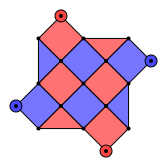

In [46]:
surface_code_circuit.diagram(
    type="detector-slice-svg", 
    tick=11,   # <--- look at different ticks to see the stabilizers change over time!
)

In [47]:
surface_code_circuit.diagram(type="match-graph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":4102,"max":[18.6666679382324,27.3704261779785,36.539981842041],"min":[-9.3704252243042,-9.3704252243042,-9.5399808883667],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":718,"max":[27.3704261779785,6,36.539981842041],"min":[-0.666666984558105,-0.666666984558105,-9.5399808883667],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":49224,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":2,"byteLength":8616,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":49224,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AAAAAAAAQEEAAAAAo4uuwEYXXUG66ALBAAAAAAAAQEEAAAAAAADAQAAAwEAAAAAAAAAAAAAAQEEAAAAAAAAAAAAAQEEAAEBAAADAQAAAwEAAAAAAAABAQQAAQEEAAAAAAADAQAAAwEAAAAAAAADAQAAAwEAAAEBAAADAQAAAwEAAAAAAAADAQAAAwEAAAEBAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAwEAAAAAAAAAAAAAAQEEAAEBAAADAQAAAwEAAAAAAAAAAAAAAQEEAAEBAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAABAQQAAQEEAAAAAgethQYHrYUHDoxjBAABAQQAAQEEAAAAAAACQQQAAwEAAAAAAAABAQQAAQEEAAAAAAACQQQAAwEAAAAAAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAADAQAAAwEAAAEBAAABAQQAAQEEAAAAAAADAQAAAwEAAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAADAQAAAwEAAAEBAAABAQQAAwEAAAEBAAADAQAAAQEEAAEBAAABAQQAAQEEAAAAAAADAQAAAwEAAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAABAQQAAQEEAAAAAAADAQAAAwEAAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAAAAAAAAQEEAAEBAAABAQQAAQEEAAAAAAAAAAAAAQEEAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAAAAAAAAQEEAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAABAQQAAQEEAAAAAAAAAAAAAQEEAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAABAQQAAQEEAAEBAAABAQQAAQEEAAAAAAABAQQAAQEEAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAAABAQQAAQEEAAEBAAABAQQAAwEAAAEBAAADAQAAAQEEAAEBAAACQQQAAwEAAAAAAAADAQAAAwEAAAEBAAACQQQAAwEAAAAAAAADAQAAAwEAAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAACQQQAAwEAAAAAAAACQQQAAwEAAAEBAAACQQQAAwEAAAAAAAACQQQAAwEAAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAACQQQAAwEAAAAAAAABAQQAAQEEAAEBAAACQQQAAwEAAAAAAAABAQQAAQEEAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAAAAAAEBAAADAQAAAAAAAAMBAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAwEAAAEBAAAAAAAAAQEEAAEBAAADAQAAAwEAAAEBAAAAAAAAAQEEAAEBAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAADAQAAAwEAAAEBAAAAAAAAAQEEAAEBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAADAQAAAwEAAAEBAAAAAAAAAQEEAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAADAQAAAwEAAAEBAAAAAAAAAQEEAAEBAAADAQAAAQEEAAEBAunVWQJJiakH8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAADAQAAAwEAAAEBAAABAQQAAQEEAAEBAAADAQAAAwEAAAEBAAABAQQAAQEEAAEBAAABAQQAAwEAAAEBAAADAQAAAQEEAAEBAAADAQAAAwEAAAEBAAADAQAAAwEAAAMBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAwEAAAEBAAADAQAAAQEEAAEBAAABAQQAAwEAAAEBAAABAQQAAwEAAAMBAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAQEEAAAAAgethQYHrYUHDoxjBAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAADAQAAAAAAAAEBA/VF4QASFy8CGcI3AAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAABAQQAAwEAAAEBAkmJqQbp1VkD8scjAAACQQQAAwEAAAEBAAABAQQAAQEEAAEBAAACQQQAAwEAAAEBAAA

In [48]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_z",
            rounds=d * 3,
            distance=d,
            after_clifford_depolarization=noise,
            after_reset_flip_probability=noise,
            before_measure_flip_probability=noise,
            before_round_data_depolarization=noise,
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [3, 5, 7]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting workers...
10 cases left
    case: processes=4  ~core_mins_left=1       shots_left=994000   errors_left=4190    {'d': 5, 'r': 15, 'p': 0.008}
    case: processes=0  ~core_mins_left=None    shots_left=1000000  errors_left=5000    {'d': 5, 'r': 15, 'p': 0.009}
    case: processes=0  ~core_mins_left=None    shots_left=1000000  errors_left=5000    {'d': 5, 'r': 15, 'p': 0.01}
    case: processes=0  ~core_mins_left=None    shots_left=1000000  errors_left=5000    {'d': 5, 'r': 15, 'p': 0.011}
6 cases left
    case: processes=2  ~core_mins_left=1       shots_left=994600   errors_left=3368    {'d': 5, 'r': 15, 'p': 0.012}
    case: processes=2  ~core_mins_left=1       shots_left=999500   errors_left=4921    {'d': 7, 'r': 21, 'p': 0.008}
    case: processes=0  ~core_mins_left=1       shots_left=999900   errors_left=4983    {'d': 7, 'r': 21, 'p': 0.009}
5 cases left
    case: processes=1  ~core_mins_left=1       shots_left=978184   errors_left=1574    {'d': 7, 'r': 21, 'p': 0.008}
    c

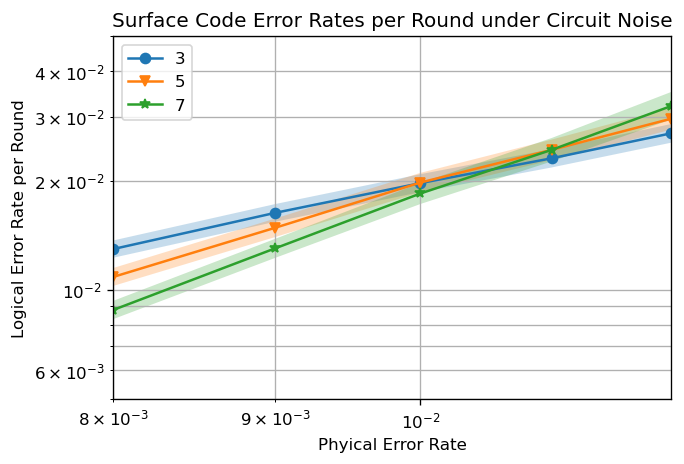

In [49]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stats: stats.json_metadata['p'],
    group_func=lambda stats: stats.json_metadata['d'],
    failure_units_per_shot_func=lambda stats: stats.json_metadata['r'],
)
ax.set_ylim(5e-3, 5e-2)
ax.set_xlim(0.008, 0.012)
ax.loglog()
ax.set_title("Surface Code Error Rates per Round under Circuit Noise")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger